In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn-dataset/customer_churn_dataset-testing-master.csv
/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv')

# Display the first 30 rows
print(data.head(30))

    CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0          2.0  30.0  Female    39.0             14.0            5.0   
1          3.0  65.0  Female    49.0              1.0           10.0   
2          4.0  55.0  Female    14.0              4.0            6.0   
3          5.0  58.0    Male    38.0             21.0            7.0   
4          6.0  23.0    Male    32.0             20.0            5.0   
5          8.0  51.0    Male    33.0             25.0            9.0   
6          9.0  58.0  Female    49.0             12.0            3.0   
7         10.0  55.0  Female    37.0              8.0            4.0   
8         11.0  39.0    Male    12.0              5.0            7.0   
9         12.0  64.0  Female     3.0             25.0            2.0   
10        13.0  29.0    Male    18.0              9.0            0.0   
11        14.0  52.0  Female    21.0              6.0            3.0   
12        15.0  22.0    Male    41.0             17.0           

In [3]:
# Create a copy of the original dataset to avoid modifying it
cleaned_data = data.copy()

In [4]:
# Check for missing values
missing_values = cleaned_data.isnull().sum()
missing_values

CustomerID           1
Age                  1
Gender               1
Tenure               1
Usage Frequency      1
Support Calls        1
Payment Delay        1
Subscription Type    1
Contract Length      1
Total Spend          1
Last Interaction     1
Churn                1
dtype: int64

In [5]:
# Drop rows with missing values
cleaned_data.dropna(inplace=True)

# Confirm no more missing values
print("Missing Values in Cleaned Data after Dropping Rows:")
print(cleaned_data.isnull().sum())


Missing Values in Cleaned Data after Dropping Rows:
CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64


In [6]:
# Display the cleaned and formatted data after handling missing values
print("Cleaned and Formatted Data after Handling Missing Values:")
print(cleaned_data.head())

Cleaned and Formatted Data after Handling Missing Values:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0  Female    39.0             14.0            5.0   
1         3.0  65.0  Female    49.0              1.0           10.0   
2         4.0  55.0  Female    14.0              4.0            6.0   
3         5.0  58.0    Male    38.0             21.0            7.0   
4         6.0  23.0    Male    32.0             20.0            5.0   

   Payment Delay Subscription Type Contract Length  Total Spend  \
0           18.0          Standard          Annual        932.0   
1            8.0             Basic         Monthly        557.0   
2           18.0             Basic       Quarterly        185.0   
3            7.0          Standard         Monthly        396.0   
4            8.0             Basic         Monthly        617.0   

   Last Interaction  Churn  
0              17.0    1.0  
1               6.0    1.0  
2               3.0    1.

In [7]:
# Encode 'Gender' (assuming '0' for Male and '1' for Female)
cleaned_data['Gender'] = cleaned_data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

# Encode 'Subscription Type' and 'Contract Length' using one-hot encoding
cleaned_data = pd.get_dummies(cleaned_data, columns=['Subscription Type', 'Contract Length'], drop_first=True)

# Display the cleaned and formatted data after encoding
print("Cleaned and Formatted Data after Encoding:")
print(cleaned_data.head())


Cleaned and Formatted Data after Encoding:
   CustomerID   Age  Gender  Tenure  Usage Frequency  Support Calls  \
0         2.0  30.0       1    39.0             14.0            5.0   
1         3.0  65.0       1    49.0              1.0           10.0   
2         4.0  55.0       1    14.0              4.0            6.0   
3         5.0  58.0       0    38.0             21.0            7.0   
4         6.0  23.0       0    32.0             20.0            5.0   

   Payment Delay  Total Spend  Last Interaction  Churn  \
0           18.0        932.0              17.0    1.0   
1            8.0        557.0               6.0    1.0   
2           18.0        185.0               3.0    1.0   
3            7.0        396.0              29.0    1.0   
4            8.0        617.0              20.0    1.0   

   Subscription Type_Premium  Subscription Type_Standard  \
0                      False                        True   
1                      False                       False   
2

General Statistics:
          CustomerID            Age         Gender         Tenure  \
count  440832.000000  440832.000000  440832.000000  440832.000000   
mean   225398.667955      39.373153       0.432319      31.256336   
std    129531.918550      12.442369       0.495399      17.255727   
min         2.000000      18.000000       0.000000       1.000000   
25%    113621.750000      29.000000       0.000000      16.000000   
50%    226125.500000      39.000000       0.000000      32.000000   
75%    337739.250000      48.000000       1.000000      46.000000   
max    449999.000000      65.000000       1.000000      60.000000   

       Usage Frequency  Support Calls  Payment Delay    Total Spend  \
count    440832.000000  440832.000000  440832.000000  440832.000000   
mean         15.807494       3.604437      12.965722     631.616223   
std           8.586242       3.070218       8.258063     240.803001   
min           1.000000       0.000000       0.000000     100.000000   
25%

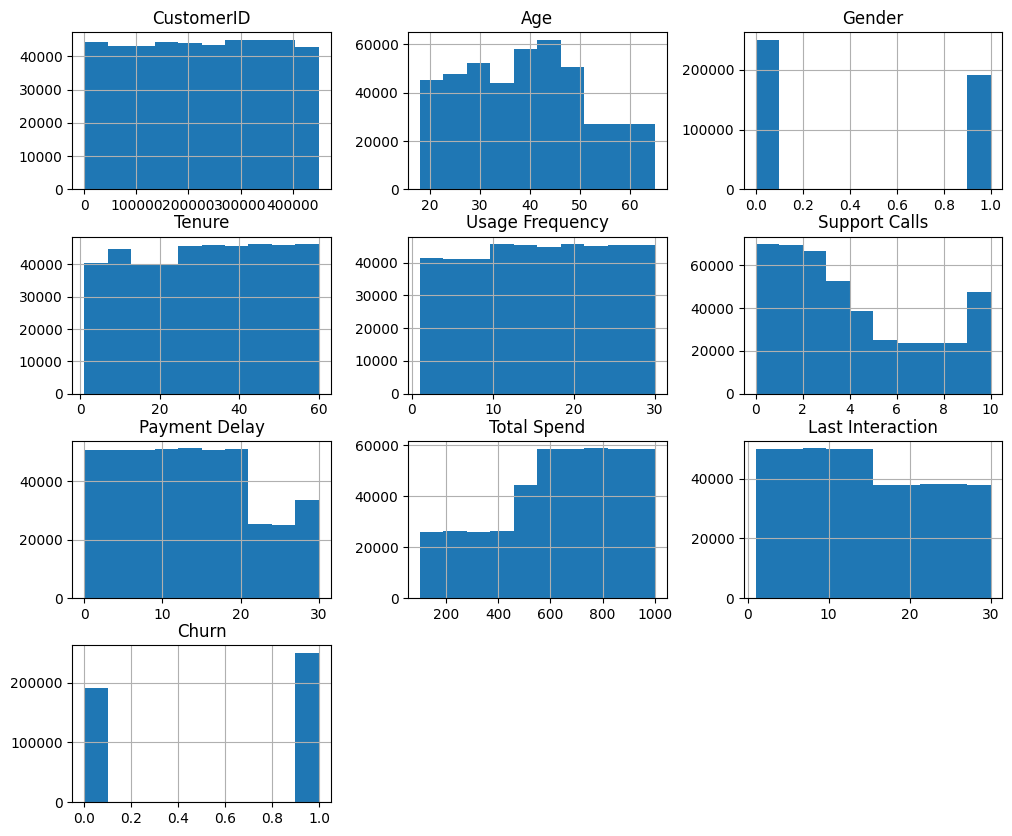


Correlation Matrix:
                            CustomerID       Age    Gender    Tenure  \
CustomerID                    1.000000 -0.181977 -0.146922  0.044129   
Age                          -0.181977  1.000000  0.031419 -0.011630   
Gender                       -0.146922  0.031419  1.000000 -0.007978   
Tenure                        0.044129 -0.011630 -0.007978  1.000000   
Usage Frequency               0.038455 -0.007190 -0.007978 -0.026800   
Support Calls                -0.482894  0.158451  0.091212 -0.027640   
Payment Delay                -0.262029  0.061738  0.048449 -0.016588   
Total Spend                   0.359289 -0.084684 -0.066138  0.019006   
Last Interaction             -0.125356  0.028980 -0.134786 -0.006903   
Churn                        -0.839365  0.218394  0.175395 -0.051919   
Subscription Type_Premium     0.007948 -0.002873 -0.003189 -0.015415   
Subscription Type_Standard    0.006843 -0.001847  0.002469 -0.011580   
Contract Length_Monthly      -0.363186  0.0

In [8]:
# Explore general statistics
statistics_summary = cleaned_data.describe()

# Explore distributions of features
feature_distributions = cleaned_data.hist(figsize=(12, 10))

# Explore correlations among features
correlation_matrix = cleaned_data.corr()

# Display the statistics summary, feature distributions, and correlation matrix
print("General Statistics:")
print(statistics_summary)

print("\nDistributions of Features:")
plt.show()

print("\nCorrelation Matrix:")
print(correlation_matrix)


In [9]:
# Set the style of seaborn for better visualization
sns.set_style('whitegrid')

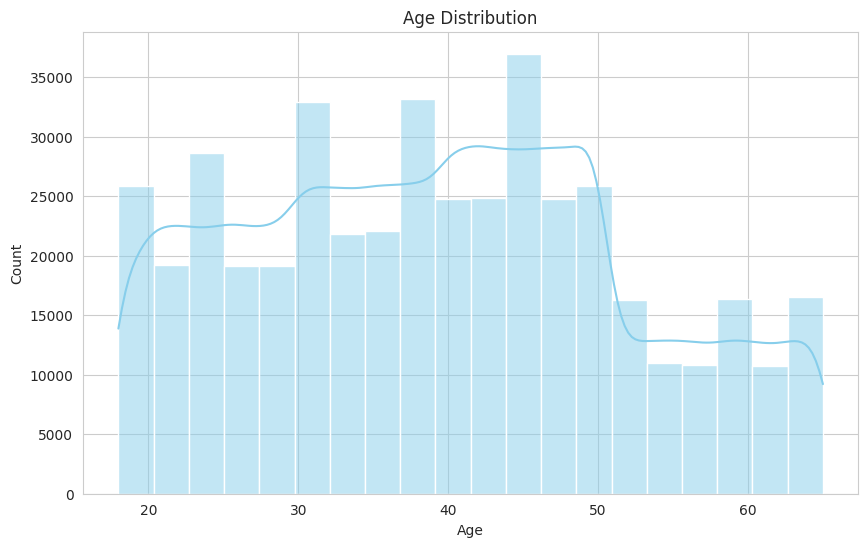

In [10]:
# Plot Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

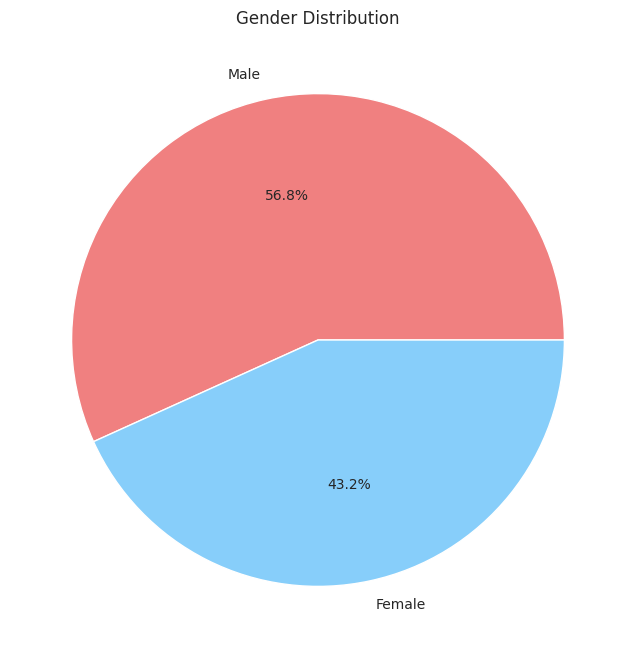

In [11]:
# Plot Gender Distribution
gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Gender Distribution')
plt.show()

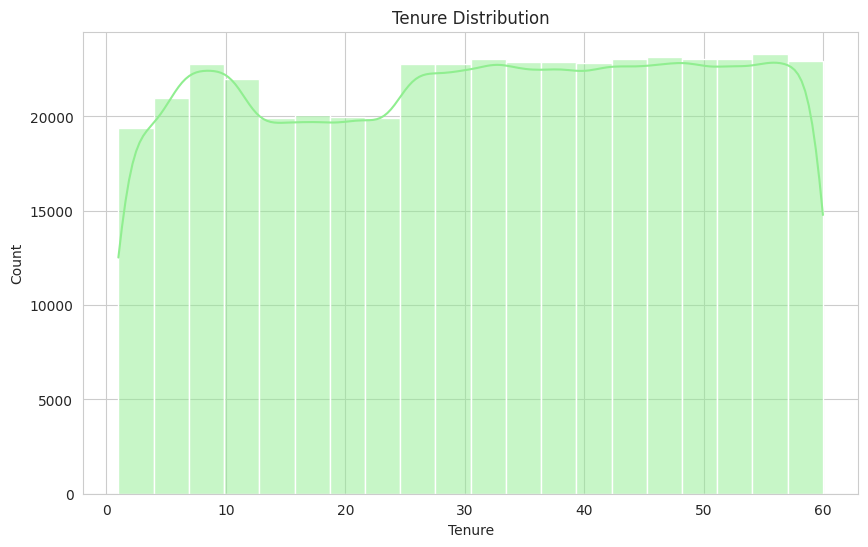

In [12]:
# Plot Tenure Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='Tenure', bins=20, kde=True, color='lightgreen')
plt.title('Tenure Distribution')
plt.xlabel('Tenure')
plt.ylabel('Count')
plt.show()

In [13]:
# Encode the categorical 'Churn' column to numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['Churn'] = label_encoder.fit_transform(data['Churn'])

In [14]:
# Drop rows with missing values in the target variable (Churn)
data = data.dropna(subset=['Churn'])

# Select features and target variable
X = data.drop('Churn', axis=1)
y = data['Churn']

In [15]:
# Identify categorical features and their indices
categorical_features = ['Gender', 'Subscription Type', 'Contract Length']
categorical_feature_indices = [X.columns.get_loc(feature) for feature in categorical_features]

In [16]:
# Encode 'Gender' (assuming '0' for Male and '1' for Female)
data['Gender'] = data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)

# Encode 'Subscription Type' and 'Contract Length' using one-hot encoding
data = pd.get_dummies(data, columns=['Subscription Type', 'Contract Length'], drop_first=True)

In [17]:
# Check the distribution of the 'Churn' column
churn_distribution = data['Churn'].value_counts()
print("Churn Distribution:")
print(churn_distribution)


Churn Distribution:
Churn
1    249999
0    190833
2         1
Name: count, dtype: int64


In [18]:
# Remove rows with 'Churn' value 2
data = data[data['Churn'].isin([0, 1])]

# Check the 'Churn' distribution again
churn_distribution = data['Churn'].value_counts()
print("Updated Churn Distribution:")
print(churn_distribution)


Updated Churn Distribution:
Churn
1    249999
0    190833
Name: count, dtype: int64


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter


# Split the data into features and target
X = data.drop('Churn', axis=1)
y = data['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Check the class distribution after SMOTE
print('Churn Distribution after SMOTE:')
print(Counter(y_train_balanced))

# Now you can use X_train_balanced and y_train_balanced for model training
# Remember to use X_test and y_test for testing


Churn Distribution after SMOTE:
Counter({0: 199895, 1: 199895})


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the RandomForestClassifier
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the classifier on the balanced training data
rf_classifier.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print("Model Evaluation - Random Forest Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Model Evaluation - Random Forest Classifier:
Accuracy: 0.9996370524119002
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     38063
           1       1.00      1.00      1.00     50104

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167



In [21]:
from sklearn.linear_model import LogisticRegression

# Initialize the model
logistic_regression = LogisticRegression(max_iter = 500, random_state=42)

# Train the model
logistic_regression.fit(X_train_balanced, y_train_balanced)

# Predict on the test set
y_pred_logistic = logistic_regression.predict(X_test)

# Evaluate the model
print("Model Evaluation - Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Classification Report:")
print(classification_report(y_test, y_pred_logistic))


Model Evaluation - Logistic Regression:
Accuracy: 0.9585899486202321
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     38063
           1       0.98      0.95      0.96     50104

    accuracy                           0.96     88167
   macro avg       0.96      0.96      0.96     88167
weighted avg       0.96      0.96      0.96     88167

